In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from src.util import calculate_convexity_ratio, non_boundary_convexity
import numpy as np
from scipy.ndimage import label as nd_label
from src.util import color_code_cells
from src.cpm_basic import CellularPottsModel

# Convexity and Concavity

In [67]:
n_cells=75
n_types=2 
T=26 
L=150
J = 100
adhessions= np.array([[0, 0.2, 0.2],  
                      [0.2, J, J],
                      [0.2, J, J]]) 
volume_coefficient= np.array([0, 10, 20])
perimeter_coefficient= np.array([0, 1, 1])
lattice_type="hex"
object_volumes=None # Is default set in the CPM class if none
periodic=False

## Example Calculation

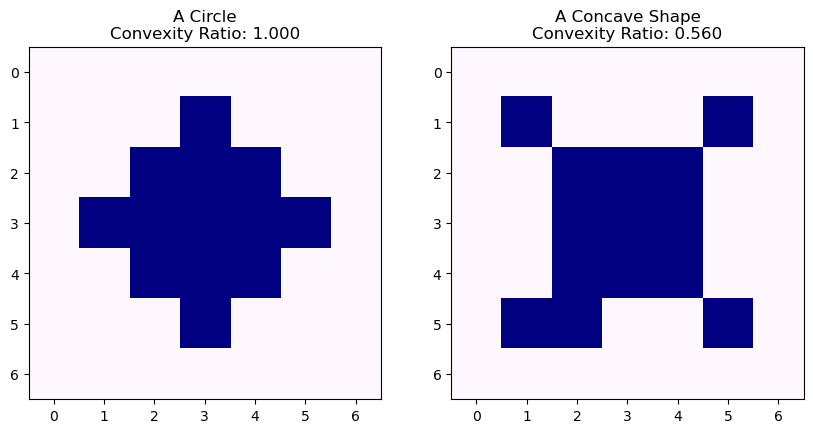

In [65]:
# --- Example 1: Your Convex Shape (3x3 Square) ---
grid_convex = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 2, 0, 0, 0],
    [0, 0, 2, 2, 2, 0, 0],
    [0, 2, 2, 2, 2, 2, 0],
    [0, 0, 2, 2, 2, 0, 0],
    [0, 0, 0, 2, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

ratio_convex = calculate_convexity_ratio(grid_convex, target_value=2)

# --- Example 2: A Concave L-Shape ---
grid_concave = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 0, 2, 0],
    [0, 0, 2, 2, 2, 0, 0],
    [0, 0, 2, 2, 2, 0, 0],
    [0, 0, 2, 2, 2, 0, 0],
    [0, 2, 2, 0, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 0]
])
ratio_concave = calculate_convexity_ratio(grid_concave, target_value=2)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(grid_convex, cmap='gist_ncar_r')
axs[0].set_title(f'A Circle\nConvexity Ratio: {ratio_convex:.3f}')
axs[1].imshow(grid_concave, cmap='gist_ncar_r')
axs[1].set_title(f'A Concave Shape\nConvexity Ratio: {ratio_concave:.3f}')
plt.show()

## Exploration

In [68]:
# Set up the Constants and Parameters
J = 500
J_strong = 50
lattice_type="hex"

strong_adhesion_between_types = np.array([[0, 0.2, 0.2],  
                                        [0.2, 500, 50],
                                        [0.2, 50, 500]]) 
weak_adhesion_between_types = np.array([[0, 0.2, 0.2],  
                                          [0.2, 50, 500],
                                          [0.2, 500, 50]])

same_adhesion_between_types = np.array([[0, 0.2, 0.2],  
                                        [0.2, J, J],
                                        [0.2, J, J]])
same_strong_adhesion_between_types = np.array([[0, 0.2, 0.2],  
                                               [0.2, J_strong, J_strong],
                                               [0.2, J_strong, J_strong]])
five_volume_coefficient = np.array([0, 1, 5])
ten_volume_coefficient = np.array([0, 1, 10])
same_volume_coefficient = np.array([0, 1, 1])

five_perimeter_coefficient = np.array([0, 1, 5])
ten_perimeter_coefficient = np.array([0, 1, 10])
same_perimeter_coefficient = np.array([0, 1,  1])


adhesion_params = [strong_adhesion_between_types, weak_adhesion_between_types, same_adhesion_between_types]
adhesion_param_names = ['Strong Adhesion Between Types', 'Weak Adhesion Between Types', 'Same Adhesion Between Types']
volume_params = [five_volume_coefficient, ten_volume_coefficient, same_volume_coefficient]
volume_param_names = ['Five times Volume Coeff for type 2', 'Ten times Volume Coeff for type 2', 'Same Volume Coeff']
perimeter_params = [five_perimeter_coefficient, ten_perimeter_coefficient, same_perimeter_coefficient]
perimeter_param_names = ['Five times Perimeter Coeff for type 2', 'Ten times Perimeter Coeff for type 2', 'Same Perimeter Coeff']

# Only variying Perimeter (Strong Adhesion)

In [71]:
same_volume_coefficient_five = np.array([0, 5, 5])
same_volume_coefficient_ten = np.array([0, 10, 10])

vol_and_perim_params = [(same_volume_coefficient, same_perimeter_coefficient),
    (same_volume_coefficient, five_perimeter_coefficient),
    (same_volume_coefficient, ten_perimeter_coefficient)]

vol_and_perim_param_names = ['Same Volume and Perimeter Coefficients',
                            'Same Five times Volume Coeff and Five times Perimeter Coeff for type 2',
                            'Same Ten times Volume Coeff and Ten times Perimeter Coeff for type 2']

grids_const_vol = []
type_consts_vol = []
convexity_consts_vol = []
repeat = 10

for i, (volume_coefficient, perimeter_coefficient) in enumerate(vol_and_perim_params):
    grid_rep = []
    type_rep = []
    convex_rep = []
    for _ in range(repeat):
        cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, adhessions=strong_adhesion_between_types,
                                 volume_coefficient=volume_coefficient,
                                 perimeter_coefficient=perimeter_coefficient,
                                 lattice_type=lattice_type, periodic=periodic)
        grid = cpm.run_a_sim(steps=1000000)
        types = cpm.tau
        convexity = non_boundary_convexity(grid, types)
        grid_rep.append(grid)
        type_rep.append(types)
        convex_rep.append(convexity)
    grids_const_vol.append(grid_rep)
    type_consts_vol.append(type_rep)
    convexity_consts_vol.append(convex_rep)


100%|██████████| 1000000/1000000 [02:45<00:00, 6057.49it/s]


In [81]:
with open("saves/convexity_exploration/hex_strong_adhesion_grids_const_vol_var_perimeter.pkl", "wb") as f:
    pickle.dump((grids_const_vol, type_consts_vol), f)

In [85]:
G1, G2, G3 = grids_const_vol[0][0], grids_const_vol[1][0], grids_const_vol[2][2]
T1, T2, T3 = type_consts_vol[0][0], type_consts_vol[1][0], type_consts_vol[2][2]
G = [G1, G2, G3]
T = [T1, T2, T3]

Same Volume and Perimeter Coefficients - Convexity Ratios: [0.         0.7472512  0.69940129]
Same Five times Volume Coeff and Five times Perimeter Coeff for type 2 - Convexity Ratios: [0.         0.67707866 0.84602794]
Same Ten times Volume Coeff and Ten times Perimeter Coeff for type 2 - Convexity Ratios: [0.         0.78000868 0.89671071]


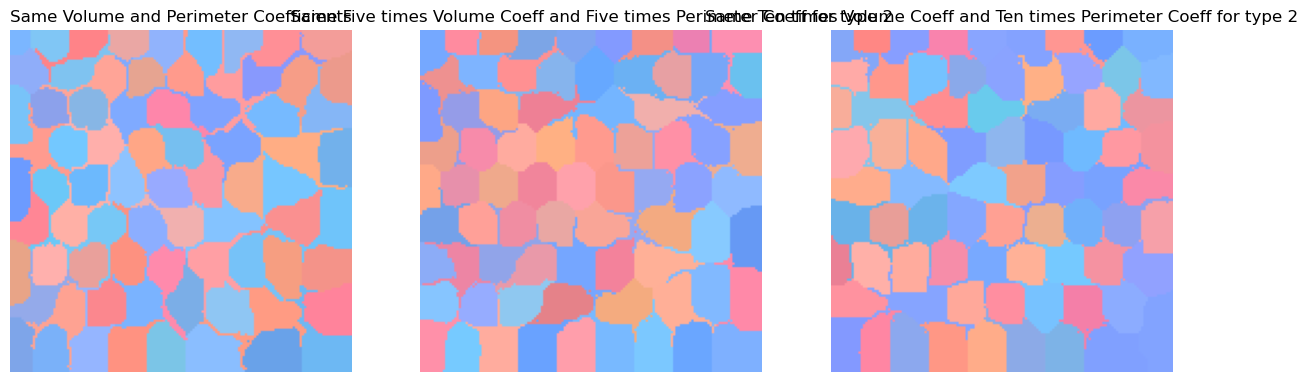

In [86]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    ax[i].imshow(color_code_cells(G[i], T[i]))
    ax[i].set_title(vol_and_perim_param_names[i])
    ax[i].axis('off')
    print(f"{vol_and_perim_param_names[i]} - Convexity Ratios: {convexity_consts_vol[i][0]}")

# Multiple

## Strong Adhesion 

In [4]:
vol_and_perim_params = [(five_volume_coefficient, five_perimeter_coefficient), (ten_volume_coefficient, ten_perimeter_coefficient)]
grid_results_vp = []
type_results_vp = []
convexity_vp = []
repeat = 10

for i, (vol_coeff, perim_coeff) in enumerate(vol_and_perim_params):
    rep_grid_results_vp = []
    rep_type_results_vp = []
    rep_convexity_vp = []

    for r in range(repeat):
        cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, volume_coefficient=vol_coeff,
                                    perimeter_coefficient=perim_coeff, adhessions=strong_adhesion_between_types,
                                    lattice_type=lattice_type, object_volumes=object_volumes, periodic=periodic)
        grid = cpm.run_a_sim(steps=1000000)
        types = cpm.tau
        convexity = non_boundary_convexity(grid, types)
        rep_grid_results_vp.append(grid)
        rep_type_results_vp.append(types)
        rep_convexity_vp.append(convexity)
    grid_results_vp.append(rep_grid_results_vp)
    type_results_vp.append(rep_type_results_vp)
    convexity_vp.append(rep_convexity_vp)

100%|██████████| 1000000/1000000 [02:52<00:00, 5782.27it/s]


In [6]:
with open('saves/convexity_exploration/strong_adhesion_volume_and_perimeter_results.pkl', 'wb') as f:
    pickle.dump((grid_results_vp, type_results_vp), f)

## Null Model

In [33]:
null_strong_grid = []
null_strong_types = []
null_strong_convexity = []
for r in range(repeat):
    cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, volume_coefficient=same_volume_coefficient,
                                perimeter_coefficient=same_perimeter_coefficient, adhessions=same_strong_adhesion_between_types,
                                lattice_type=lattice_type, object_volumes=object_volumes, periodic=periodic)
    grid = cpm.run_a_sim(steps=1000000)
    types = cpm.tau
    convexity = non_boundary_convexity(grid, types)
    null_strong_grid.append(grid)
    null_strong_types.append(types)
    null_strong_convexity.append(convexity)

100%|██████████| 1000000/1000000 [02:26<00:00, 6834.29it/s]


In [34]:
with open('saves/convexity_exploration/strong_adhesion_null_results.pkl', 'wb') as f:
    pickle.dump((null_strong_grid, null_strong_types), f)

## Figure

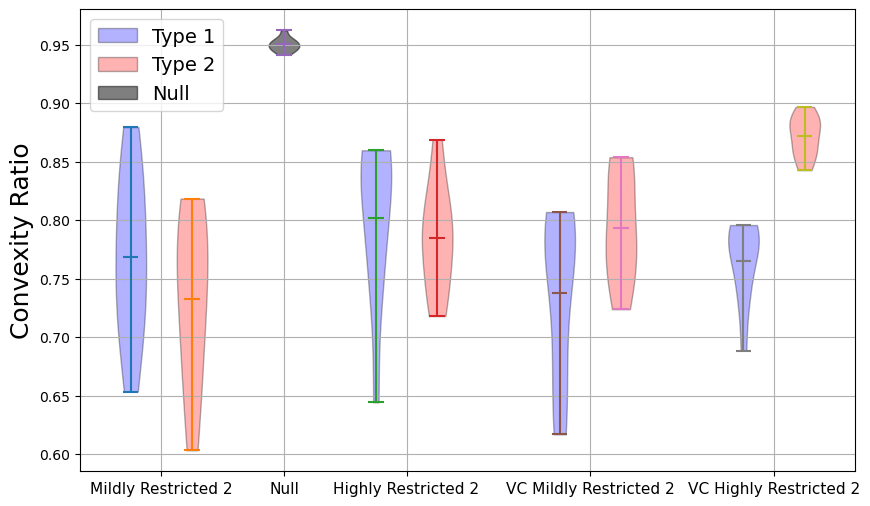

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))

# ---- group (label x5) ----
v1 = ax.violinplot(np.array(convexity_vp[0])[:,1],
                   positions=[1], showmeans=True)
for b in v1['bodies']:
    b.set_facecolor('blue')
    b.set_edgecolor('black')

v2 = ax.violinplot(np.array(convexity_vp[0])[:,2],
                   positions=[2], showmeans=True)
for b in v2['bodies']:
    b.set_facecolor('red')
    b.set_edgecolor('black')

# ---- group (label x10) ----
v3 = ax.violinplot(np.array(convexity_vp[1])[:,1],
                   positions=[5], showmeans=True)
for b in v3['bodies']:
    b.set_facecolor('blue')
    b.set_edgecolor('black')

v4 = ax.violinplot(np.array(convexity_vp[1])[:,2],
                   positions=[6], showmeans=True)
for b in v4['bodies']:
    b.set_facecolor('red')
    b.set_edgecolor('black')

# ---- Group Null (Label Null) ----
v5 = ax.violinplot(np.array(null_strong_convexity)[:,1],
                     positions=[3.5], showmeans=True)
for b in v5['bodies']:
    b.set_facecolor('black')
    b.set_edgecolor('black')
    b.set_alpha(0.5)

# ----- Group Volume Const ----
v6 = ax.violinplot(np.array(convexity_consts_vol[1])[:,1],
                   positions=[8], showmeans=True)
for b in v6['bodies']:
    b.set_facecolor('blue')
    b.set_edgecolor('black')

v7 = ax.violinplot(np.array(convexity_consts_vol[1])[:,2],
                     positions=[9], showmeans=True)
for b in v7['bodies']:
    b.set_facecolor('red')
    b.set_edgecolor('black')

v8 = ax.violinplot(np.array(convexity_consts_vol[2])[:,1],
                   positions=[11], showmeans=True)
for b in v8['bodies']:
    b.set_facecolor('blue')
    b.set_edgecolor('black')

v9 = ax.violinplot(np.array(convexity_consts_vol[2])[:,2],
                     positions=[12], showmeans=True)
for b in v9['bodies']:
    b.set_facecolor('red')
    b.set_edgecolor('black')




# Tick labels
ax.set_xticks([1.5, 3.5, 5.5, 8.5, 11.5])   # midpoints between pairs
ax.set_xticklabels(['Mildly Restricted 2', 'Null', 'Highly Restricted 2', 'VC Mildly Restricted 2', 'VC Highly Restricted 2'], fontsize=11)
ax.set_ylabel('Convexity Ratio', fontsize=18)
ax.legend([v1["bodies"][0], v2["bodies"][0], v5["bodies"][0]], ['Type 1', 'Type 2', 'Null'], fontsize=14)
ax.grid()
plt.show()
